Working from Git repository Rev_2C-0-g7318b5f



<IPython.core.display.Javascript object>


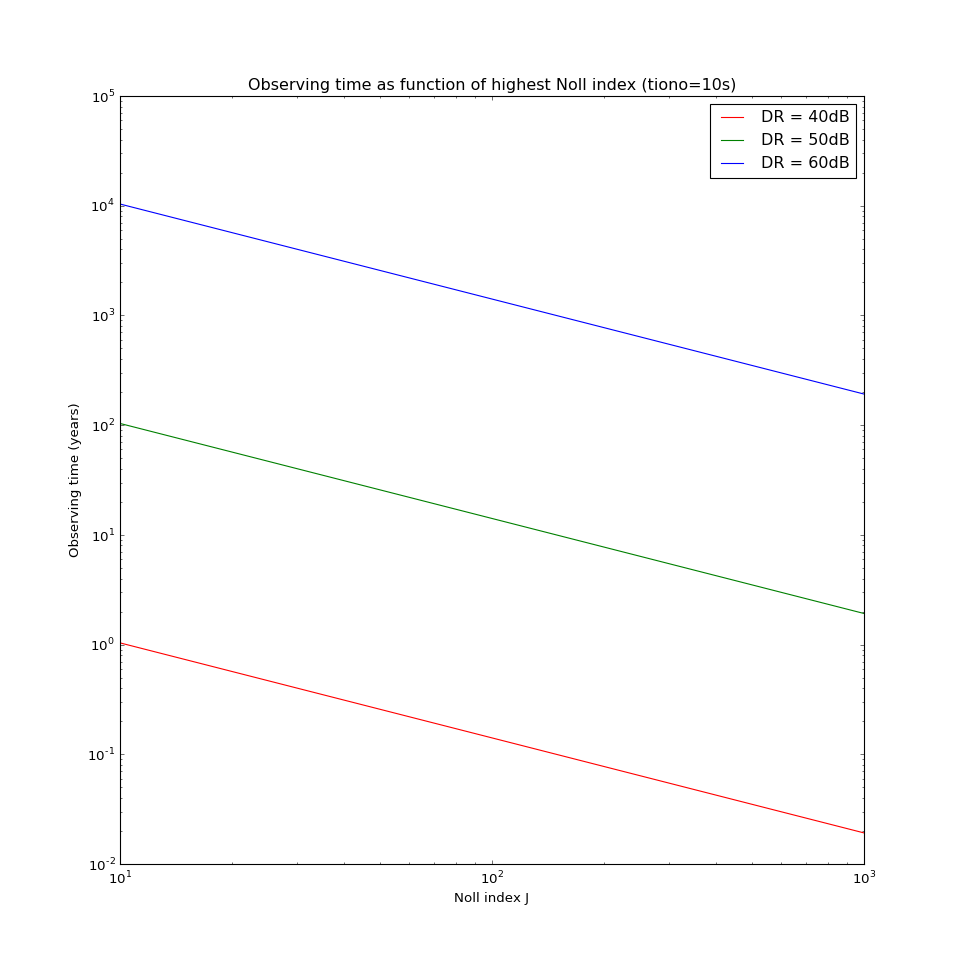

In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 12.0)
#pylab.rcParams['image.cmap'] = 'rainbow' 

from telutil import *

import subprocess
print "Working from Git repository %s" % subprocess.check_output(["git",  "describe", "--long", "--all"])

plt.clf()

ti=TelIono()

B=25.7
nstations=1

J=numpy.arange(10.0,1000.0)

tsky=ti.tsky(J,DR=1e4,B=B)/(365.0*24.0*3600.0)
plt.loglog(J,tsky, color='r', label='DR = 40dB')

tsky=ti.tsky(J,DR=1e5,B=B)/(365.0*24.0*3600.0)
plt.loglog(J,tsky, color='g', label='DR = 50dB')

tsky=ti.tsky(J,DR=1e6,B=B)/(365.0*24.0*3600.0)
plt.loglog(J,tsky, color='b', label='DR = 60dB')

plt.xlabel('Noll index J')
plt.ylabel('Observing time (years)')
plt.title('Observing time as function of highest Noll index (tiono=10s)')

plt.legend()

plt.show()

plt.savefig('dr.pdf')

#plt.close('all')